# Microstructure generation

Micro-structure generation is one of the most important issues in multi-scale simulation. Usually, we can generate a series of different micro-strcutures to reflect the actual distribution of two materials those fullfill an RVE. 
1. Components of RVE
- Fiber material
- Matrix material 
2. Schematic of RVE 
<center><img src="RVE.png" width="300"></center>

<center>Figure 1. schemaric of RVE </center>

# Selected algorithm for Micro-structure generation 

- Generating the micro-structures is a non-trival problem because there are many requirements such as the partiles should not overlap between each other, different shapes of partcles should provide, the particles also shoulf obey the periodical boundary conditions, and so on. 
- With regular shapes, such as disk, ellipse in 2D scenario, sphere in 3D scenario; we can obtain the analytical formula to describe their shapes. Therefore, it provides much more information to design an algorithm to generate the micro-structures. Moreover, most of those algorithms are based on techniques like Monte Carlo Simulation, Melocular dynamics and so forth, so there are no same micro-structures from two different realizations.
- What's more, if the shapes are arbitrary then the generation of micro-structure becomes very difficult as an NP hard problem. 

--selected methods in this version of rve-simulator

[1](https://www.sciencedirect.com/science/article/pii/S0266353808001048?casa_token=s9ISzrlWlGYAAAAA:m0PtidsMewaSuJOFLYEKC9NhggEZa0U01-rxW67DHR1ehCwBMg3gqGnzX3XTMxNF_DwGCxI_) Melro, A. R., Camanho, P. P., & Pinho, S. T. (2008). Generation of random distribution of fibres in long-fibre reinforced composites. Composites Science and Technology, 68(9), 2092-2102.

# Use the developed functions to generate 2d  micro-structure 

In [2]:
# third-party packages
import sys

# from collections import OrderedDict

# path of local project
folder_path = "/home/yaga/Documents/GitHub/F3DASM/src/"
sys.path.insert(0, folder_path)
# local packages 

from f3dasm.simulation.microstructure.circle_particles import CircleParticles


## Generate circle inclusion in a square 
- In this part, I want to show have to use the developed 2D microstructure generator. 
- There are 5 arguments for this function, which are length, width, radius_mean, radius_std, and vol_req. 
>- Length and width are used to control the range of the square, ans usually the value of length should be the same as that of width.
>- Meanwhile, the radius_mu and radius_std are used to control the information of fibers. During the realization, we assume that those cirlce inclusions ober normal distribution. In this case, we make the shapes of the fibers more general. However, it is also quite straightforward to generate homogenous circles by setting the value of radius_std to 0 
>- vol_req is the stopping criterion of the algorithm, the algorithm will stop when the volume fraction reaches the required one. 


Time of generate the 2D RVE with volume fraction            = 0.31  is 0.02 s


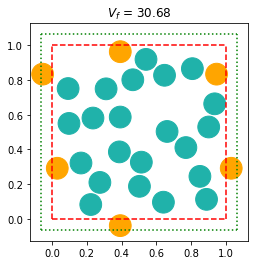

In [3]:
# initilize the class for 2D micro-structure generation 
microstructure_generator = CircleParticles(
    length=1.0,
    width=1.0,
    radius_mu=0.0625,
    radius_std=0.0,
    vol_req=0.30,
) 
# output the features for the rve 
microstructure_generator.generate_rve() 
# visualize the geometry of the 2D rve generated by the algorithm 
microstructure_generator.plot_rve() 

## convert the micro-structure to the CRATE format 
for generating the low fidelity data, we have to CRATE where has the SCA and ASCA methods. However, CRATE has its own way to identify the micro-structure with .rgmsh file. 

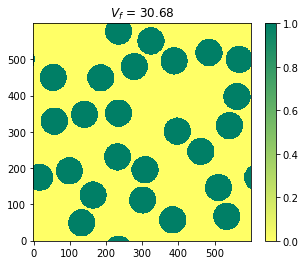

In [4]:
# show it by the crate format 
microstructure_generator.crate_rgmsh(num_discrete=600)
microstructure_generator.rgmsh_plot()

# 3D RVE micro-structure generation 

In [5]:
# import the class for 3d micro-structure generation 
from f3dasm.simulation.microstructure.shpere_particles import SphereParticles

Time of generate the 2D RVE with volume fraction            = 0.10  is 0.01 s


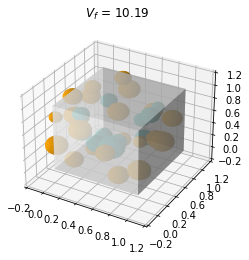

In [6]:
# define the class for 3D microstructure generation
rve3d_generator = SphereParticles(
    length=1.0,
    width=1.0,
    height=1.0,
    radius_mu=0.1,
    radius_std=0.015,
    vol_req=0.10,
)
rve3d_generator.generate_rve()
rve3d_generator.plot_rve()